# 2 EDA

# Modelado Predictivo del Rendimiento Financiero en Unidades de Negocio mediante Machine Learning


## Objetivo del análisis exploratorio

El objetivo de este análisis exploratorio es comprender la estructura financiera y operativa de las unidades de negocio, evaluar la calidad del dato y justificar las transformaciones necesarias para el modelado.

Durante esta fase se analizarán:
- distribuciones y outliers
- patrones de valores faltantes
- relaciones entre variables
- Se definirán las estrategias de imputación y creación de nuevas variables.

Las decisiones tomadas en este EDA están orientadas a mejorar la estabilidad, interpretabilidad y capacidad predictiva de los modelos posteriores.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\balle\Desktop\DataScience\ML_project\data\Processed\dataset_clean.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unidad_ID             1041 non-null   object 
 1   Departamento          1041 non-null   object 
 2   Periodo_ID            1041 non-null   int64  
 3   Ingresos              1041 non-null   float64
 4   Gastos                1041 non-null   float64
 5   Activos               1041 non-null   float64
 6   Pasivos               1041 non-null   float64
 7   EBIT                  1041 non-null   float64
 8   ROA                   920 non-null    float64
 9   ROE                   920 non-null    float64
 10  Margen_Explotacion    920 non-null    float64
 11  Endeudamiento         920 non-null    float64
 12  Indice_Rentabilidad   920 non-null    float64
 13  Plantilla             921 non-null    float64
 14  Costes_Fijos          921 non-null    float64
 15  CostesVariables      

In [4]:
df.head(5)

,Unidad_ID,Departamento,Periodo_ID,Ingresos,Gastos,Activos,Pasivos,EBIT,ROA,ROE,Margen_Explotacion,Endeudamiento,Indice_Rentabilidad,Plantilla,Costes_Fijos,CostesVariables,Crecimiento_Ingresos
0,UO_086,Logística,1,123456.780000,24987.379399,10860.717125,9234.423602,3811.366786,0.140907,-0.003602,0.156345,0.871875,-0.108494,270.0,5538.499759,5589.317523,0.134289
1,UO_015,Tecnología,8,30450.091226,19446.985846,17670.376360,12420.632727,12315.649015,NaN,NaN,NaN,NaN,NaN,295.0,1099.788083,2547.473093,0.101430
2,UO_077,Finanzas,1,47170.073204,33076.391477,6926.752898,2096.144509,13716.391078,0.048257,0.136341,0.315895,0.499244,0.079839,353.0,6912.371977,13080.839384,0.233546
3,UO_001,Tecnología,9,19592.915242,13880.256093,23211.886570,19841.303916,6666.729731,NaN,NaN,NaN,NaN,NaN,138.0,4808.517120,4559.273614,-0.073837
4,UO_118,Logística,2,19593.076079,13469.944561,12749.502547,4685.473804,6000.973263,0.109413,-0.016162,0.275845,0.607457,0.002040,NaN,NaN,NaN,NaN


In [5]:
df.describe()

,Periodo_ID,Ingresos,Gastos,Activos,Pasivos,EBIT,ROA,ROE,Margen_Explotacion,Endeudamiento,Indice_Rentabilidad,Plantilla,Costes_Fijos,CostesVariables,Crecimiento_Ingresos
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000,920.000000,920.000000,920.000000,920.000000,920.000000,921.000000,921.000000,921.000000,921.000000
mean,5.446686,25689.137997,19939.746254,21384.535097,12759.460055,5691.679567,0.064096,0.103369,0.225246,0.590972,0.006085,259.574376,6895.407707,9880.041511,0.095714
std,2.882522,14135.018629,11234.666308,14815.359452,10306.287087,4176.837617,0.050328,0.099999,0.099270,0.174328,0.058683,134.877332,4475.425909,6088.387360,0.117271
min,1.000000,5719.042519,3849.892318,2691.205621,999.075844,359.729515,-0.019836,-0.049940,0.050155,0.300032,-0.166345,20.000000,748.742557,1107.540168,-0.099318
25%,3.000000,16012.581050,12294.849808,11941.697430,6576.234146,2748.310144,0.019206,0.029859,0.139519,0.439025,-0.033187,140.000000,3900.300236,5805.449918,-0.006166
50%,5.000000,22298.062876,17058.539505,17854.909557,10168.811330,4581.079902,0.062841,0.103642,0.225317,0.585958,0.004935,264.000000,5605.281103,8314.816534,0.091201
75%,8.000000,31532.408207,24853.806017,26882.246358,15808.956791,7456.210193,0.108978,0.179988,0.309411,0.741515,0.046404,375.000000,8621.937299,12276.372000,0.202118
max,10.000000,123456.780000,89113.808154,149856.449652,113412.828749,32683.534149,0.149820,1.600000,0.399989,0.898749,0.169001,499.000000,42990.312538,48459.537917,0.299956


## Revisión inicial del dataset

En esta primera inspección se valida que el dataset consolidado presenta:
- un número consistente de observaciones tras la unificación,
- tipos de datos correctos para cada variable,
- y una estructura alineada con el problema de negocio.

Esta revisión permite confirmar que el dataset está listo para un análisis exploratorio profundo y detectar posibles inconsistencias antes de avanzar.


## 1 Distribuciones de variables numéricas 

## Distribución de variables numéricas

El análisis de las distribuciones permite identificar:
- Asimetrías relevantes en variables de volumen como Ingresos, Gastos o Activos.
- Mayor estabilidad en ratios financieros.
- Posibles colas largas asociadas a unidades de gran tamaño.

Estas diferencias sugieren que, en fases posteriores, algunas variables podrían beneficiarse de transformaciones (por ejemplo, escalado o log-transform) para mejorar el comportamiento del modelo.


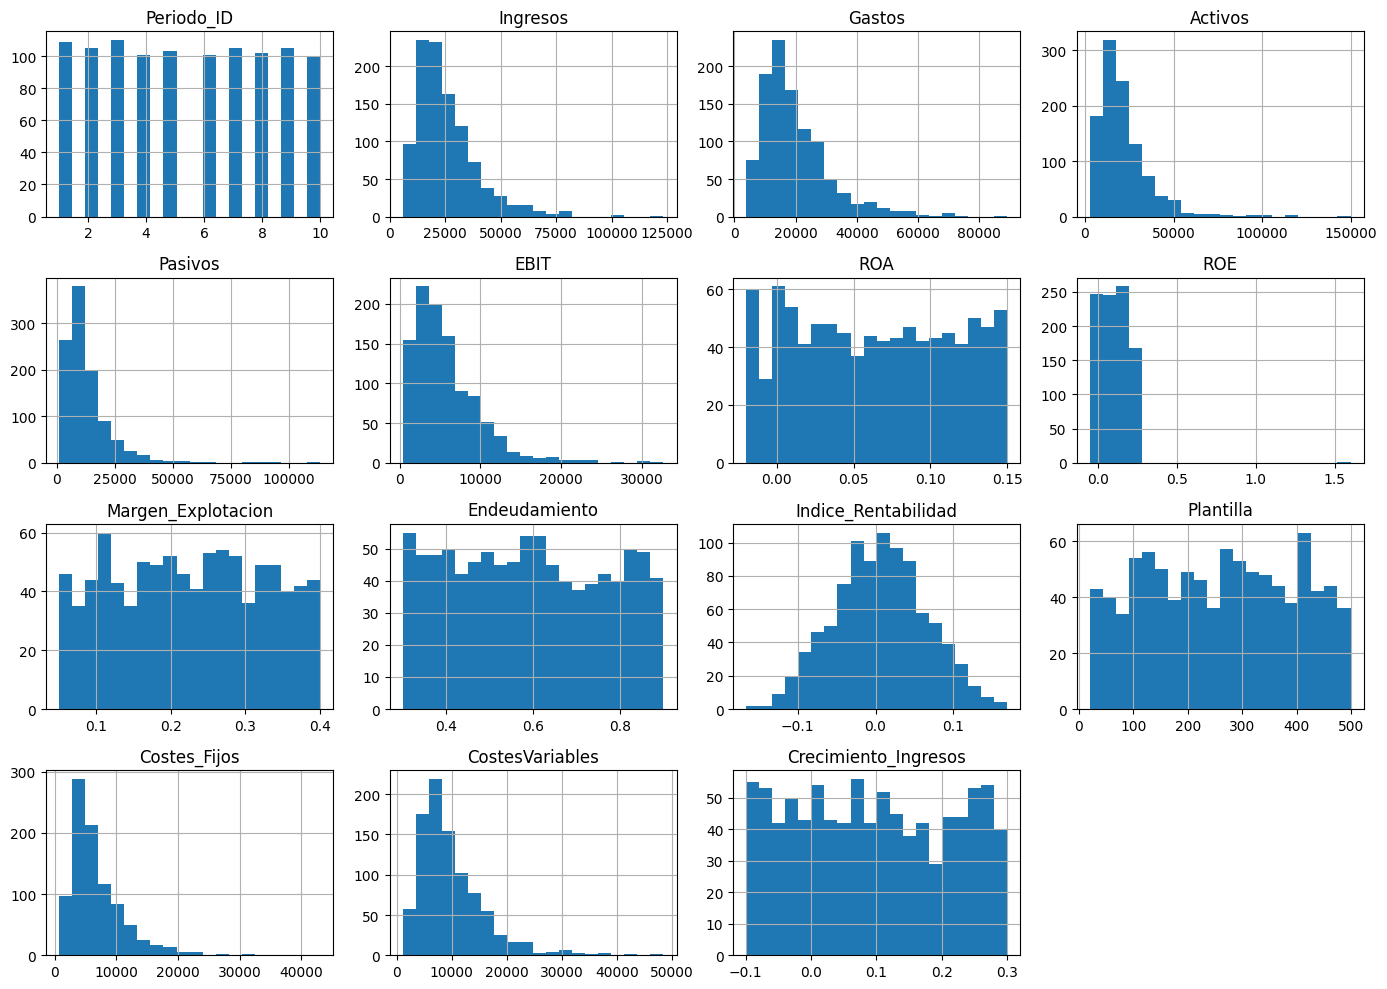

In [6]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

df[num_cols].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

## Análisis de distribuciones

El análisis de las distribuciones muestra diferencias claras entre los distintos tipos de variables:

- Las variables de volumen (Ingresos, Gastos, Activos, Pasivos, EBIT) presentan distribuciones asimétricas con colas largas, reflejando la coexistencia de unidades de negocio de tamaños muy distintos.
- Los ratios financieros (ROA, ROE, Margen de Explotación, Endeudamiento) muestran distribuciones más concentradas y estables.
- Las variables de crecimiento presentan mayor dispersión y valores negativos, coherentes con escenarios de contracción en algunas unidades.

Estas características son relevantes para el modelado, ya que sugieren la necesidad de aplicar técnicas de escalado y tener en cuenta la heterogeneidad estructural del dataset.


## 2 Boxplots de outliers

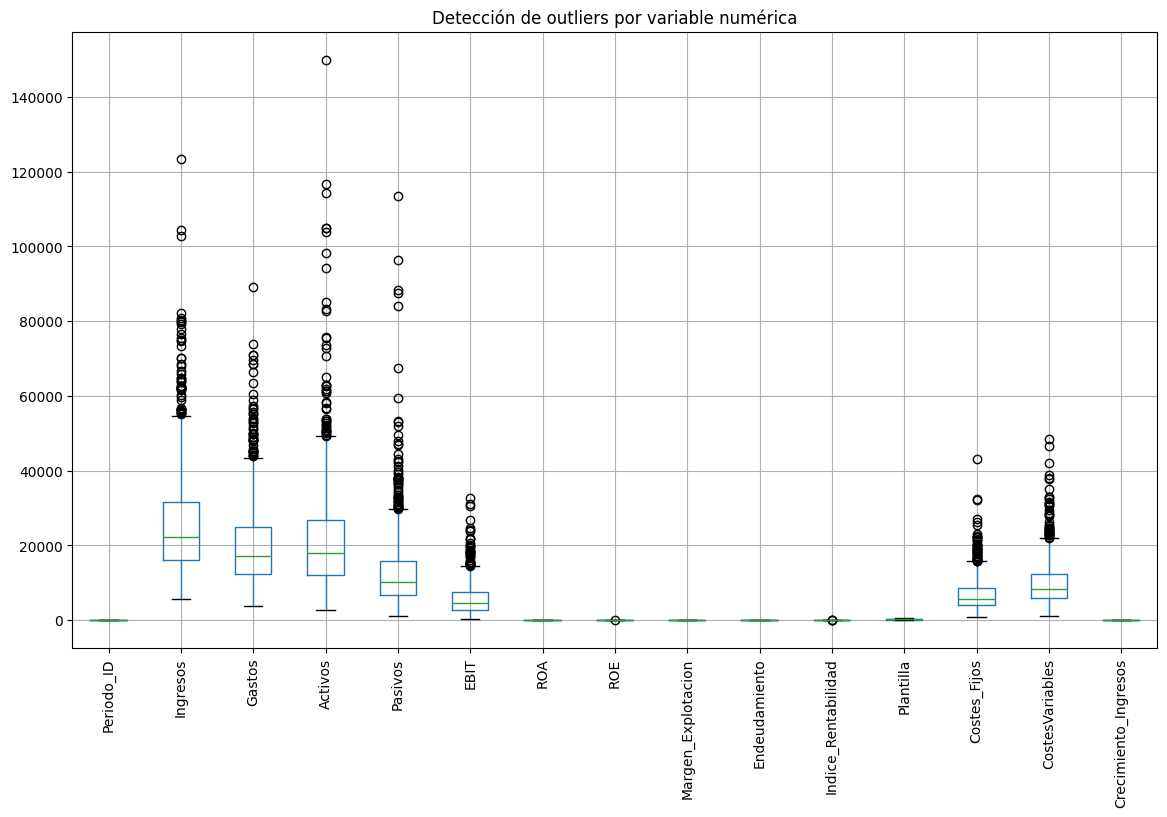

In [7]:
plt.figure(figsize=(14, 8))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Detección de outliers por variable numérica")
plt.show()

## Análisis de outliers

Los boxplots muestran la presencia de valores extremos, especialmente en variables de volumen como ingresos, activos o costes.

Estos valores no se consideran errores, sino reflejo de unidades de negocio con tamaños muy diferentes. Dado que el objetivo del modelo es anticipar comportamientos financieros reales, los outliers se mantienen para preservar la variabilidad estructural del dataset.


## 3 Matriz de correlación 

## Análisis de correlaciones

El análisis de correlación se utiliza para identificar relaciones lineales entre variables y detectar posibles redundancias.

Se emplea la correlación de Pearson al tratarse de variables continuas y ya transformadas a formato numérico, con el objetivo de anticipar problemas de multicolinealidad en el modelado.


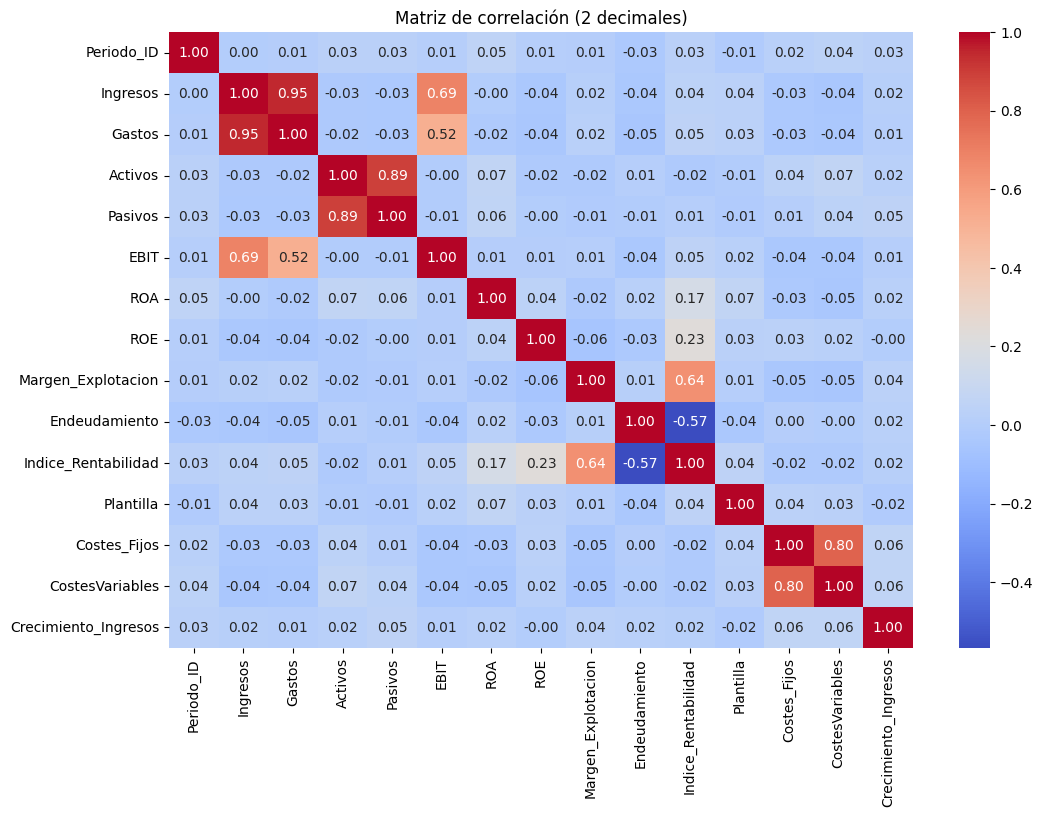

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de correlación (2 decimales)")
plt.show()

Este análisis servirá como base para la selección de características, priorizando aquellas variables que aporten información complementaria y evitando introducir señales redundantes en el modelo.

La presencia de correlaciones elevadas entre variables de volumen refuerza la decisión de priorizar ratios y métricas normalizadas en el modelado.


### 3.1 Matriz de correlación variables financieras 

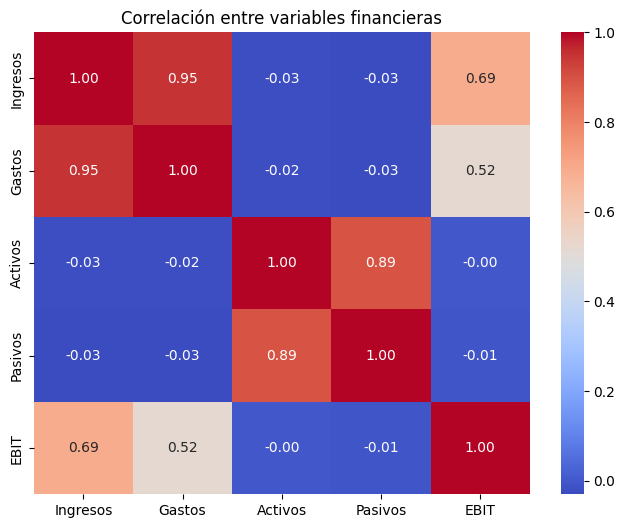

In [9]:
fin_cols = ["Ingresos", "Gastos", "Activos", "Pasivos", "EBIT"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[fin_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlación entre variables financieras")
plt.show()

### 3.1 Matriz de correlación – variables financieras

La matriz de correlación entre las principales variables financieras muestra relaciones coherentes con la estructura económica de las unidades de negocio.

Se observa una correlación elevada entre Ingresos y Gastos, así como entre Activos y Pasivos, lo cual es esperable en organizaciones donde el tamaño de la actividad condiciona tanto el volumen de costes como la estructura patrimonial.

El EBIT presenta una correlación moderada con las variables de volumen, indicando que la rentabilidad operativa no depende únicamente del tamaño, sino también de la eficiencia en la gestión de costes.

Estas relaciones confirman la consistencia interna del dataset y anticipan posibles problemas de multicolinealidad en variables de volumen, que serán tenidos en cuenta en la fase de modelado mediante selección de características y regularización.


## 3.2 Matriz correlación de ratios 

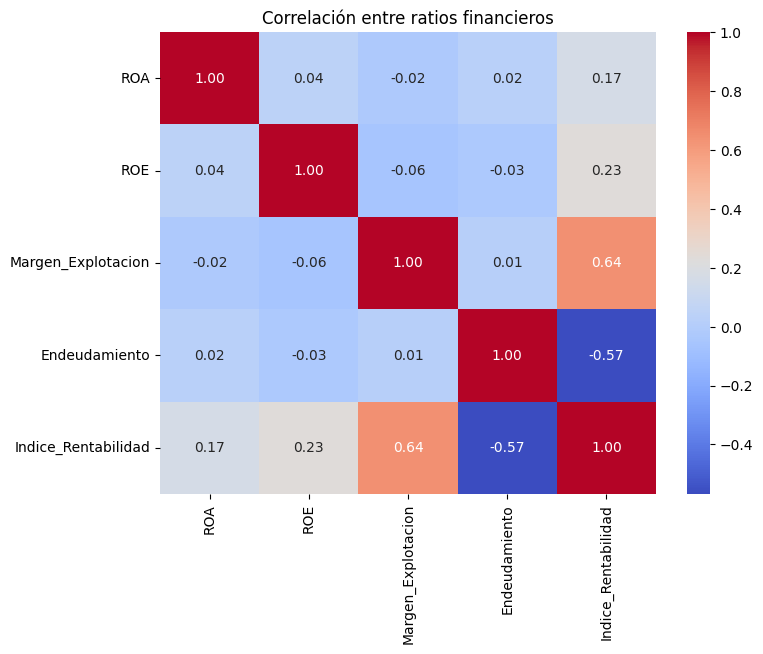

In [10]:
ratio_cols = ["ROA", "ROE", "Margen_Explotacion", "Endeudamiento", "Indice_Rentabilidad"]

plt.figure(figsize=(8, 6))
sns.heatmap(df[ratio_cols].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlación entre ratios financieros")
plt.show()

### 3.2 Matriz de correlación – ratios financieros

La matriz de correlación entre los ratios financieros muestra relaciones más moderadas que las observadas en las variables financieras de volumen (magnitudes financieras).

Los indicadores de rentabilidad (ROA, ROE y Margen de Explotación) presentan correlaciones positivas entre sí, lo que refleja que capturan dimensiones relacionadas del desempeño económico, aunque desde perspectivas distintas.

El endeudamiento mantiene una relación débil o inversa con los ratios de rentabilidad, lo que es coherente con escenarios en los que mayores niveles de apalancamiento pueden presionar la eficiencia financiera.

En conjunto, la matriz sugiere que los ratios financieros aportan información complementaria y no redundante, lo que los convierte en variables especialmente valiosas para el modelado predictivo.


## 4. Análisis por departamento

El análisis por departamento permite evaluar diferencias estructurales en el comportamiento financiero y operativo de las unidades de negocio.

Este análisis es relevante porque:
- Los niveles de ingresos y costes pueden variar significativamente entre departamentos.
- Los márgenes y la rentabilidad no son homogéneos.
- Ciertas dinámicas operativas pueden ser específicas de cada área.

Comprender estas diferencias es clave para justificar estrategias de imputación, segmentación y modelado posteriores.



#### 4.1 Distribución de unidades por departamentos

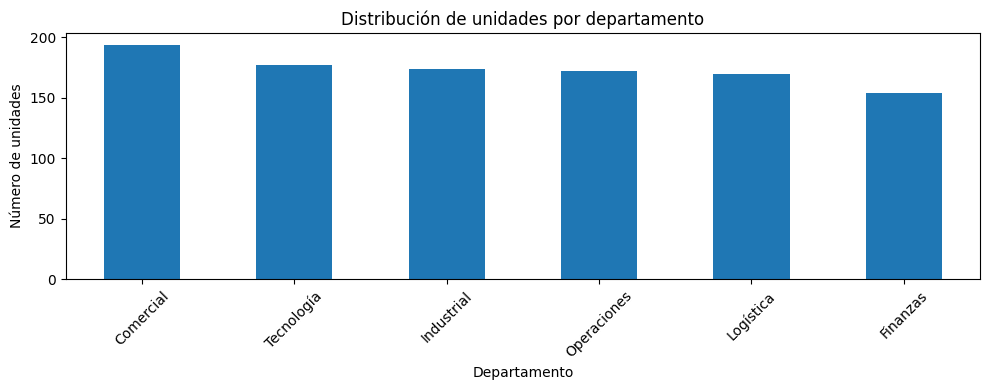

In [11]:
plt.figure(figsize=(10, 4))
df["Departamento"].value_counts().plot(kind="bar")

plt.title("Distribución de unidades por departamento")
plt.xlabel("Departamento")
plt.ylabel("Número de unidades")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cada fila del dataset representa una unidad de negocio observada en un periodo determinado. 
Por tanto, este gráfico muestra cuántas observaciones hay por departamento a lo largo del tiempo, 
y no el número de unidades de negocio distintas que existen en cada departamento.

La distribución por sectores está bastante equilibrada.

#### 4.2 Boxplot de Ingresos por departamento 

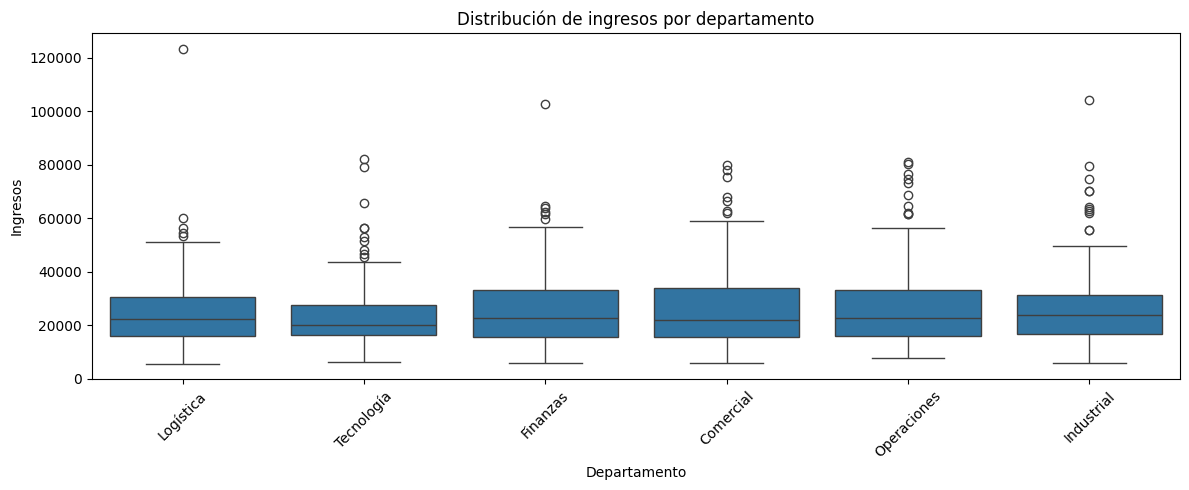

In [12]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Departamento", y="Ingresos")

plt.title("Distribución de ingresos por departamento")
plt.xlabel("Departamento")
plt.ylabel("Ingresos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis de ingresos por departamento muestra que, aunque las medianas son similares entre áreas, existe una elevada variabilidad interna dentro de cada departamento.

Esto indica que conviven unidades de negocio de distinto tamaño y nivel de actividad dentro de una misma área, lo que refuerza la necesidad de utilizar métricas normalizadas y ratios financieros en el modelado.


#### 4.3 Boxplot de EBIT por departamento

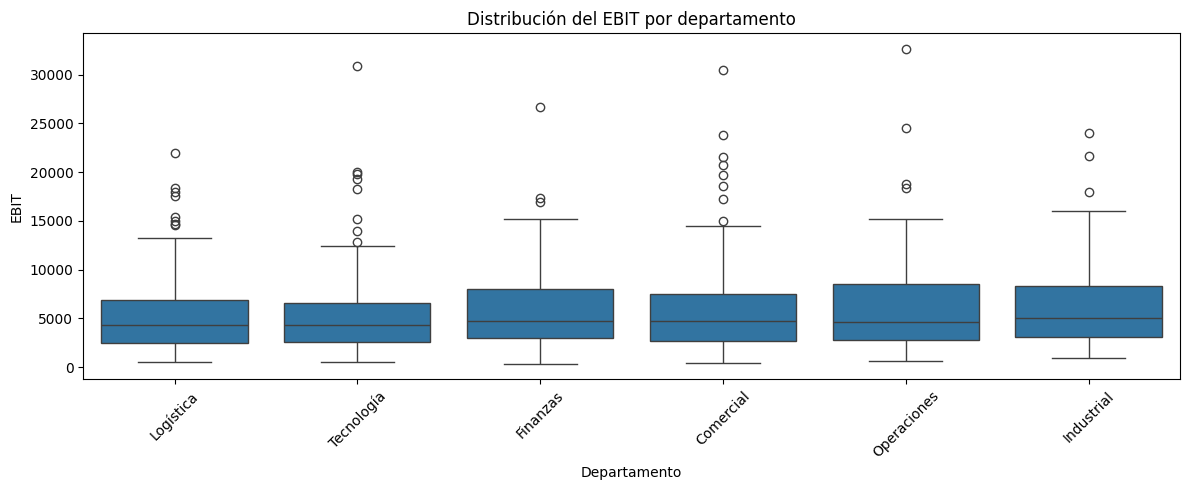

In [13]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="Departamento", y="EBIT")

plt.title("Distribución del EBIT por departamento")
plt.xlabel("Departamento")
plt.ylabel("EBIT")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El análisis del EBIT por departamento muestra diferencias relevantes en la dispersión de los resultados operativos.

Aunque las medianas son relativamente similares entre departamentos, algunos presentan una mayor variabilidad y presencia de valores extremos, lo que indica diferencias significativas en la eficiencia operativa entre unidades dentro de una misma área.

Esta heterogeneidad sugiere que factores internos —como estructura de costes, escala operativa o productividad— influyen de forma distinta en el rendimiento, reforzando la utilidad de un enfoque predictivo a nivel de unidad.


#### 4.4 Productividad (ingresos por empleado) por departamento


In [14]:
df["Ingresos_por_Empleado"] = df["Ingresos"] / df["Plantilla"]

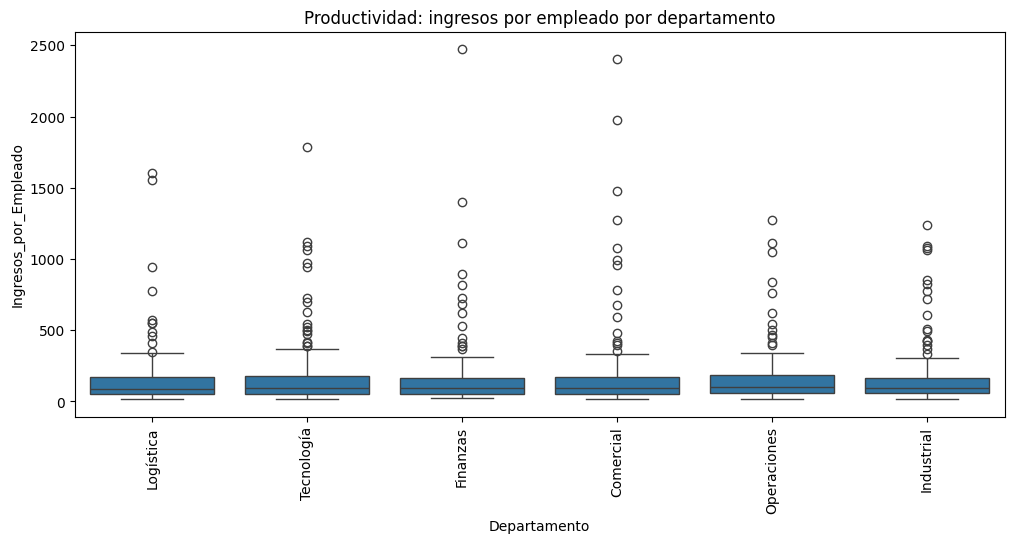

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Departamento", y="Ingresos_por_Empleado")
plt.xticks(rotation=90)
plt.title("Productividad: ingresos por empleado por departamento")
plt.show()

Este análisis muestra la distribución de la productividad medida como ingresos por empleado en cada departamento.
Se observa una elevada dispersión interna dentro de la mayoría de departamentos, lo que indica que la productividad no es homogénea entre unidades, incluso cuando pertenecen a la misma área funcional.
La presencia de valores extremos sugiere diferencias relevantes en eficiencia operativa, dimensionamiento de plantilla o modelos de negocio.

Las diferencias en ingresos por empleado reflejan oportunidades claras de mejora en la asignación de recursos y en la eficiencia operativa.
Identificar unidades con productividad significativamente inferior permite priorizar acciones de revisión de procesos, estructura de costes o dimensionamiento antes de que el impacto se refleje en los resultados financieros.

En conjunto, los análisis por departamento muestran una **alta variabilidad interna** en ingresos, EBIT y productividad, lo que indica que las unidades no operan de forma homogénea incluso dentro de la misma área funcional.

Esta heterogeneidad sugiere que existen diferencias relevantes en eficiencia operativa, estructura de costes y modelos de gestión entre unidades comparables, lo que justifica el uso de técnicas de Machine Learning para capturar patrones no evidentes a simple vista.

Desde el punto de vista del modelado, esta variabilidad es especialmente valiosa, ya que aporta señal suficiente para diferenciar unidades con comportamientos financieros estables frente a aquellas con mayor riesgo de deterioro.



Desde una perspectiva organizativa, estos resultados abren la puerta a identificar áreas de mejora dentro de cada departamento y utilizarlas como referencia para mejorar la eficiencia global.


## 5 Análisis de Valores Nulos

#### 5.1 Identificación y cuantificación de valores faltantes

Se analiza la presencia de valores nulos en el conjunto de datos con el objetivo de evaluar la calidad del dato y definir una estrategia de tratamiento adecuada antes del modelado.

Los valores faltantes se concentran principalmente en:
- ratios financieros (ROA, ROE, Margen_Explotación, Endeudamiento, Índice de Rentabilidad),
- y en variables operativas (Plantilla, Costes y Crecimiento de Ingresos),

con un porcentaje aproximado del 10–12% en dichas columnas.



#### 5.1.1 Conteo absoluto de nulos por variable


In [16]:
df.isnull().sum().sort_values(ascending=False)

ROE                      121
ROA                      121
Indice_Rentabilidad      121
Margen_Explotacion       121
Endeudamiento            121
Ingresos_por_Empleado    120
Crecimiento_Ingresos     120
Plantilla                120
CostesVariables          120
Costes_Fijos             120
Departamento               0
Unidad_ID                  0
Pasivos                    0
EBIT                       0
Ingresos                   0
Periodo_ID                 0
Gastos                     0
Activos                    0
dtype: int64

#### 5.1.2 Porcentaje de nulos por variable

In [17]:
(df.isnull().mean() * 100).sort_values(ascending=False)

ROE                      11.623439
ROA                      11.623439
Indice_Rentabilidad      11.623439
Margen_Explotacion       11.623439
Endeudamiento            11.623439
Ingresos_por_Empleado    11.527378
Crecimiento_Ingresos     11.527378
Plantilla                11.527378
CostesVariables          11.527378
Costes_Fijos             11.527378
Departamento              0.000000
Unidad_ID                 0.000000
Pasivos                   0.000000
EBIT                      0.000000
Ingresos                  0.000000
Periodo_ID                0.000000
Gastos                    0.000000
Activos                   0.000000
dtype: float64

#### 5.1.3 Visualización global del porcentaje de nulos

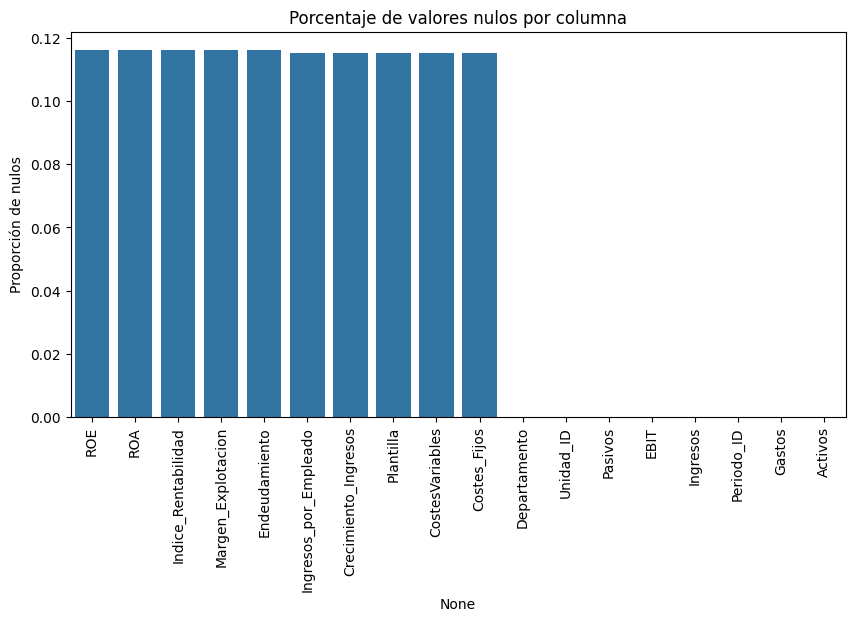

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=df.isnull().mean().sort_values(ascending=False).index,
    y=df.isnull().mean().sort_values(ascending=False).values
)
plt.xticks(rotation=90)
plt.title("Porcentaje de valores nulos por columna")
plt.ylabel("Proporción de nulos")
plt.show()

La visualización confirma que los valores nulos se concentran en un subconjunto de variables, principalmente ratios financieros y variables operativas, mientras que las variables financieras base (Ingresos, Gastos, Activos, Pasivos, EBIT) están completas.


#### 5.2 Análisis del patrón de valores nulos por departamento

Para evaluar si los valores faltantes introducen sesgos estructurales, se analiza su distribución por departamento, centrándose en las variables que presentan nulos.


#### 5.2.1 Selección de columnas con nulos

In [19]:
cols_con_nulos = [
    "ROA", "ROE", "Margen_Explotacion", "Endeudamiento",
    "Indice_Rentabilidad",
    "Plantilla", "Costes_Fijos", "CostesVariables", "Crecimiento_Ingresos"
]

#### 5.2.2 Cálculo del porcentaje de nulos por departamento

In [20]:
null_by_dept = df.groupby("Departamento")[cols_con_nulos].apply(lambda x: x.isnull().mean())
null_by_dept


,ROA,ROE,Margen_Explotacion,Endeudamiento,Indice_Rentabilidad,Plantilla,Costes_Fijos,CostesVariables,Crecimiento_Ingresos
Departamento,,,,,,,,,
Comercial,0.139175,0.139175,0.139175,0.139175,0.139175,0.154639,0.154639,0.154639,0.154639
Finanzas,0.103896,0.103896,0.103896,0.103896,0.103896,0.110390,0.110390,0.110390,0.110390
Industrial,0.103448,0.103448,0.103448,0.103448,0.103448,0.120690,0.120690,0.120690,0.120690
Logística,0.123529,0.123529,0.123529,0.123529,0.123529,0.123529,0.123529,0.123529,0.123529
Operaciones,0.122093,0.122093,0.122093,0.122093,0.122093,0.110465,0.110465,0.110465,0.110465
Tecnología,0.101695,0.101695,0.101695,0.101695,0.101695,0.067797,0.067797,0.067797,0.067797


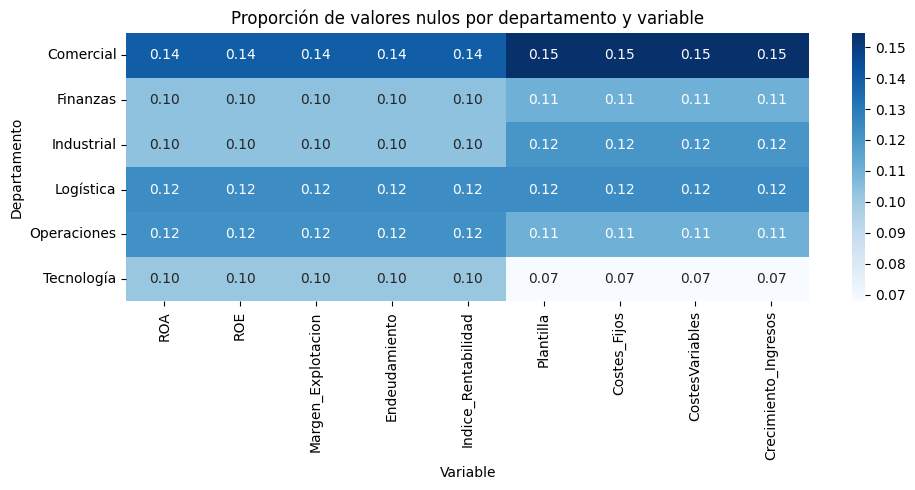

In [21]:
plt.figure(figsize=(10, 5))
sns.heatmap(null_by_dept, annot=True, fmt=".2f", cmap="Blues")
plt.title("Proporción de valores nulos por departamento y variable")
plt.ylabel("Departamento")
plt.xlabel("Variable")
plt.tight_layout()
plt.show()


**Interpretación del patrón de nulos (visión negocio)**

El análisis muestra que todos los departamentos presentan un nivel similar de valores faltantes en los ratios financieros y en las variables operativas (aprox. 10–15%).  
Esto indica que la falta de información no se debe a un problema específico de un departamento, sino a variaciones en la calidad del reporte interno.

La homogeneidad del patrón permite aplicar una solución común de imputación y señala la necesidad de mejorar la estandarización del proceso de reporting para reforzar la fiabilidad de los indicadores.


**Interpretación técnica (DS)**

Los valores nulos muestran un patrón uniforme entre departamentos, lo que confirma la ausencia de sesgos estructurales por segmento.  
Esto permite imputar por mediana sin riesgo de distorsionar grupos concretos y garantiza una preparación del dataset estable y consistente para el modelado.

La coherencia del patrón minimiza la pérdida de información y facilita que los modelos aprendan de forma fiable.



## 6 Tratamiento de Nulos (Imputación)

#### 6.1 Criterio para definir la imputación

El objetivo del tratamiento de valores nulos es mantener la coherencia del dataset sin eliminar observaciones y sin introducir distorsiones entre departamentos.  
Para ello, se aplica una estrategia diferenciada según la naturaleza de cada variable.

#### 6.2 Imputación por tipo de variable

##### 6.2.1 Ratios financieros
Los ratios se imputan por mediana dentro de cada departamento, ya que reflejan características estructurales de cada área y deben mantenerse consistentes dentro del grupo.


In [22]:
financial_ratio_cols = ["ROA","ROE","Margen_Explotacion","Endeudamiento","Indice_Rentabilidad"]

df[financial_ratio_cols] = df.groupby("Departamento")[financial_ratio_cols].transform(
    lambda x: x.fillna(x.median()))

##### 6.2.2 Imputación de variables operativas (mediana global)
Las variables operativas se imputan con la mediana global, ya que presentan un comportamiento similar entre departamentos y no requieren segmentación.


In [23]:
operational_cols = ["Plantilla","Costes_Fijos","CostesVariables","Crecimiento_Ingresos"]

df[operational_cols] = df[operational_cols].fillna(df[operational_cols].median())

#### 6.3 Verificación 

In [24]:
df.isnull().sum()

Unidad_ID                  0
Departamento               0
Periodo_ID                 0
Ingresos                   0
Gastos                     0
Activos                    0
Pasivos                    0
EBIT                       0
ROA                        0
ROE                        0
Margen_Explotacion         0
Endeudamiento              0
Indice_Rentabilidad        0
Plantilla                  0
Costes_Fijos               0
CostesVariables            0
Crecimiento_Ingresos       0
Ingresos_por_Empleado    120
dtype: int64

#### 6.4 Recalculo de métricas derivadas

In [25]:
df["Ingresos_por_Empleado"] = df["Ingresos"] / df["Plantilla"]

Se recalcula la variable derivada para garantizar consistencia tras la imputación.


In [26]:
df.isnull().sum()

Unidad_ID                0
Departamento             0
Periodo_ID               0
Ingresos                 0
Gastos                   0
Activos                  0
Pasivos                  0
EBIT                     0
ROA                      0
ROE                      0
Margen_Explotacion       0
Endeudamiento            0
Indice_Rentabilidad      0
Plantilla                0
Costes_Fijos             0
CostesVariables          0
Crecimiento_Ingresos     0
Ingresos_por_Empleado    0
dtype: int64

#### 6.5 Impacto en el modelado

La imputación permite conservar todas las observaciones y reduce el riesgo de sobreajuste, manteniendo la estabilidad estadística del dataset para los modelos supervisados.

## 7 Feature Engineering
#### Construcción de indicadores de gestión para anticipar deterioro financiero

El objetivo del feature engineering es construir indicadores financieros y operativos que permitan anticipar deterioro del rendimiento y detectar ineficiencias en las unidades de negocio, facilitando la toma de decisiones preventivas a nivel organizativo.

#### 7.1 Productividad operativa.
#### Ingresos_por_empleado

In [27]:
df["Ingresos_por_Empleado"] = df["Ingresos"] / df["Plantilla"]

**Visión negocio**
Mide la productividad de la unidad. Valores bajos indican posible sobredimensionamiento, baja eficiencia operativa o procesos ineficaces.

**Visión Data Science**
Normaliza el tamaño de la unidad y aporta señal independiente del volumen absoluto, mejorando la comparabilidad entre unidades heterogéneas.

#### 7.2 Eficiencia del gasto
##### Ratio Gastos / Ingresos

In [28]:
df["Ratio_Gastos_Ingresos"] = df["Gastos"] / df["Ingresos"]

**Visión negocio**
Indica qué proporción de los ingresos se consume en gastos. Ratios elevados anticipan presión sobre márgenes y riesgo de desviaciones presupuestarias.

**Visión Data Science**
Reduce escala, captura eficiencia relativa y suele ser altamente predictivo del deterioro financiero.

#### 7.3 Rentabilidad operativa
##### Margen operativo

In [29]:
df["Margen_Operativo"] = df["EBIT"] / df["Ingresos"]

**Visión negocio**
Permite comparar la rentabilidad operativa entre unidades independientemente de su tamaño. Un margen decreciente es una señal temprana de deterioro.

**Visión Data Science**
Variable compuesta que integra ingresos y costes, muy informativa para modelos supervisados orientados a riesgo.

#### 7.4 Estructura financiera
##### Solvencia

In [30]:
df["Solvencia"] = df["Activos"] / df["Pasivos"]

**Visión negocio**
Mide la capacidad de la unidad para cubrir sus obligaciones. Valores bajos indican fragilidad financiera y mayor riesgo estructural.

**Visión Data Science**
Ratio estable, poco ruidoso y con alto poder explicativo en modelos financieros.

#### 7.5 Rigidez operativa
##### Peso de los costes fijos

In [31]:
df["Costes_Totales"] = df["Costes_Fijos"] + df["CostesVariables"]
df["Peso_Costes_Fijos"] = df["Costes_Fijos"] / df["Costes_Totales"]

**Visión negocio**
Indica cuán rígida es la estructura de costes. Un peso elevado limita la capacidad de adaptación ante caídas de ingresos.

**Visión Data Science**
Captura riesgo estructural y suele interactuar bien con variables de crecimiento y rentabilidad.

In [32]:
df[[
    "Ingresos_por_Empleado",
    "Ratio_Gastos_Ingresos",
    "Margen_Operativo",
    "Solvencia",
    "Peso_Costes_Fijos"
]].describe()

,Ingresos_por_Empleado,Ratio_Gastos_Ingresos,Margen_Operativo,Solvencia,Peso_Costes_Fijos
count,1041.000000,1041.000000,1041.000000,1041.000000,1041.000000
mean,162.526897,0.776863,0.223331,1.846657,0.410146
std,233.237051,0.100491,0.104264,0.608945,0.080893
min,15.674444,0.202398,0.030872,0.324023,0.226809
25%,57.320107,0.692622,0.138258,1.353203,0.358083
50%,92.120111,0.780061,0.218908,1.687120,0.402675
75%,167.654608,0.863364,0.302173,2.218354,0.463405
max,2472.295315,0.949845,0.462722,5.582614,0.618001


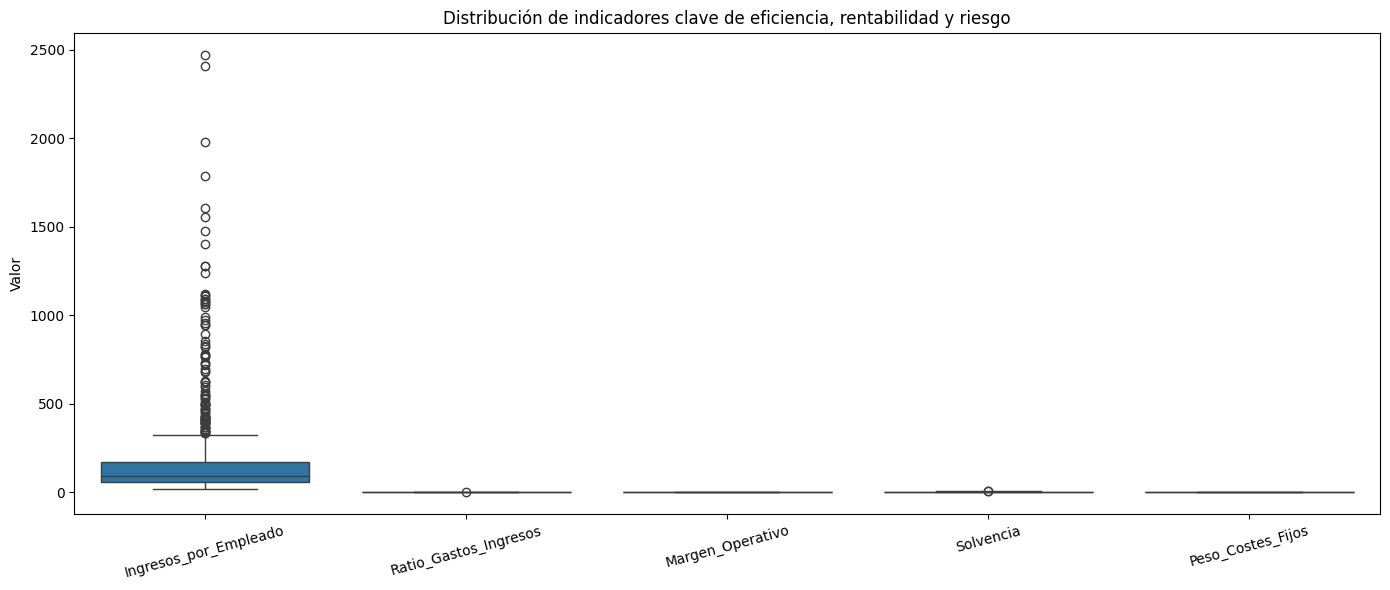

In [45]:
vars_clave = [
    "Ingresos_por_Empleado",
    "Ratio_Gastos_Ingresos",
    "Margen_Operativo",
    "Solvencia",
    "Peso_Costes_Fijos"
]

plt.figure(figsize=(14,6))
sns.boxplot(data=df[vars_clave])
plt.title("Distribución de indicadores clave de eficiencia, rentabilidad y riesgo")
plt.xticks(rotation=15)
plt.ylabel("Valor")
plt.tight_layout()
plt.show()



**Conclusión**

En esta fase se han definido cinco variables clave, ampliamente utilizadas en análisis financiero y control de gestión, que sintetizan:

- productividad,

- eficiencia operativa,

- rentabilidad,

- solidez financiera,

- rigidez estructural.

Estas variables:

- son interpretables para negocio,

- estables para modelado,

- están directamente alineadas con la detección temprana de deterioro financiero y oportunidades de mejora organizativa.

El dataset resultante queda preparado para la fase de entrenamiento y evaluación de modelos, manteniendo coherencia entre la visión estratégica de la organización y el enfoque técnico de Machine Learning.

## 8 Revisión final 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unidad_ID              1041 non-null   object 
 1   Departamento           1041 non-null   object 
 2   Periodo_ID             1041 non-null   int64  
 3   Ingresos               1041 non-null   float64
 4   Gastos                 1041 non-null   float64
 5   Activos                1041 non-null   float64
 6   Pasivos                1041 non-null   float64
 7   EBIT                   1041 non-null   float64
 8   ROA                    1041 non-null   float64
 9   ROE                    1041 non-null   float64
 10  Margen_Explotacion     1041 non-null   float64
 11  Endeudamiento          1041 non-null   float64
 12  Indice_Rentabilidad    1041 non-null   float64
 13  Plantilla              1041 non-null   float64
 14  Costes_Fijos           1041 non-null   float64
 15  Cost

In [34]:
df.shape

(1041, 23)

In [35]:
df.isnull().sum()

Unidad_ID                0
Departamento             0
Periodo_ID               0
Ingresos                 0
Gastos                   0
Activos                  0
Pasivos                  0
EBIT                     0
ROA                      0
ROE                      0
Margen_Explotacion       0
Endeudamiento            0
Indice_Rentabilidad      0
Plantilla                0
Costes_Fijos             0
CostesVariables          0
Crecimiento_Ingresos     0
Ingresos_por_Empleado    0
Ratio_Gastos_Ingresos    0
Margen_Operativo         0
Solvencia                0
Costes_Totales           0
Peso_Costes_Fijos        0
dtype: int64

In [36]:
df.dtypes

Unidad_ID                 object
Departamento              object
Periodo_ID                 int64
Ingresos                 float64
Gastos                   float64
Activos                  float64
Pasivos                  float64
EBIT                     float64
ROA                      float64
ROE                      float64
Margen_Explotacion       float64
Endeudamiento            float64
Indice_Rentabilidad      float64
Plantilla                float64
Costes_Fijos             float64
CostesVariables          float64
Crecimiento_Ingresos     float64
Ingresos_por_Empleado    float64
Ratio_Gastos_Ingresos    float64
Margen_Operativo         float64
Solvencia                float64
Costes_Totales           float64
Peso_Costes_Fijos        float64
dtype: object

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Periodo_ID,1041.0,5.446686,2.882522,1.000000,3.000000,5.000000,8.000000,10.000000
Ingresos,1041.0,25689.137997,14135.018629,5719.042519,16012.581050,22298.062876,31532.408207,123456.780000
Gastos,1041.0,19939.746254,11234.666308,3849.892318,12294.849808,17058.539505,24853.806017,89113.808154
Activos,1041.0,21384.535097,14815.359452,2691.205621,11941.697430,17854.909557,26882.246358,149856.449652
Pasivos,1041.0,12759.460055,10306.287087,999.075844,6576.234146,10168.811330,15808.956791,113412.828749
EBIT,1041.0,5691.679567,4176.837617,359.729515,2748.310144,4581.079902,7456.210193,32683.534149
ROA,1041.0,0.063970,0.047345,-0.019836,0.025933,0.062245,0.101514,0.149820
ROE,1041.0,0.103200,0.094078,-0.049940,0.035697,0.097513,0.170488,1.600000
Margen_Explotacion,1041.0,0.225388,0.093359,0.050155,0.154452,0.229258,0.295025,0.399989
Endeudamiento,1041.0,0.590437,0.164048,0.300032,0.462546,0.584595,0.721258,0.898749


In [38]:
df.head(5)

,Unidad_ID,Departamento,Periodo_ID,Ingresos,Gastos,Activos,Pasivos,EBIT,ROA,ROE,...,Plantilla,Costes_Fijos,CostesVariables,Crecimiento_Ingresos,Ingresos_por_Empleado,Ratio_Gastos_Ingresos,Margen_Operativo,Solvencia,Costes_Totales,Peso_Costes_Fijos
0,UO_086,Logística,1,123456.780000,24987.379399,10860.717125,9234.423602,3811.366786,0.140907,-0.003602,...,270.0,5538.499759,5589.317523,0.134289,457.247333,0.202398,0.030872,1.176112,11127.817282,0.497717
1,UO_015,Tecnología,8,30450.091226,19446.985846,17670.376360,12420.632727,12315.649015,0.062245,0.107599,...,295.0,1099.788083,2547.473093,0.101430,103.220648,0.638651,0.404454,1.422663,3647.261176,0.301538
2,UO_077,Finanzas,1,47170.073204,33076.391477,6926.752898,2096.144509,13716.391078,0.048257,0.136341,...,353.0,6912.371977,13080.839384,0.233546,133.626270,0.701216,0.290786,3.304521,19993.211362,0.345736
3,UO_001,Tecnología,9,19592.915242,13880.256093,23211.886570,19841.303916,6666.729731,0.062245,0.107599,...,138.0,4808.517120,4559.273614,-0.073837,141.977647,0.708432,0.340262,1.169877,9367.790734,0.513303
4,UO_118,Logística,2,19593.076079,13469.944561,12749.502547,4685.473804,6000.973263,0.109413,-0.016162,...,264.0,5605.281103,8314.816534,0.091201,74.216197,0.687485,0.306280,2.721070,13920.097637,0.402675


## Revisión final del dataset tras el EDA

En esta fase se valida que el dataset resultante, tras el proceso de limpieza, imputación y feature engineering, 
cumple los requisitos necesarios para la fase de modelado.

La revisión confirma que:
- El conjunto de datos no presenta valores nulos.
- Todas las variables numéricas están correctamente tipadas.
- Las nuevas variables generadas son coherentes desde el punto de vista financiero y operativo.
- Cada fila representa una unidad de negocio en un periodo concreto, manteniendo consistencia temporal y estructural.

El dataset resultante integra información de:
- volumen financiero,
- rentabilidad,
- estructura de costes,
- productividad operativa,
- y solvencia,

permitiendo analizar el rendimiento de las unidades desde una perspectiva integral.


#### 8.1 Matriz de correlación – Variables base (económicas “reales”)

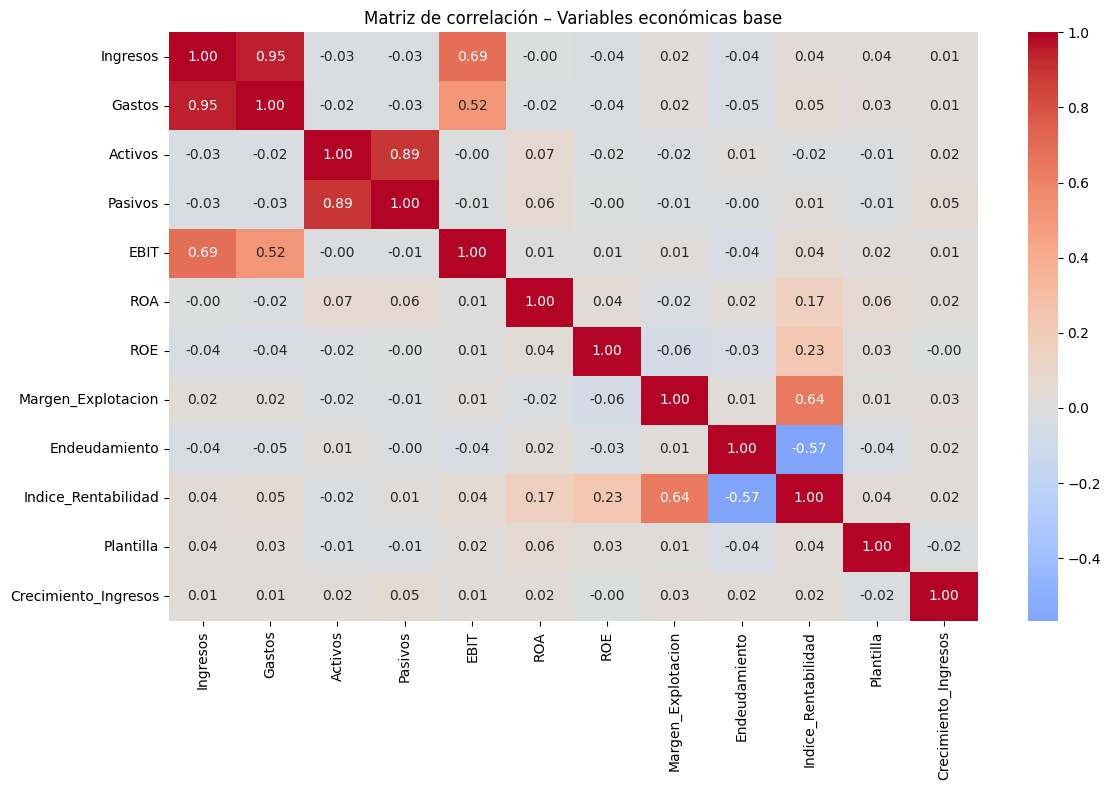

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

base_cols = [
    "Ingresos",
    "Gastos",
    "Activos",
    "Pasivos",
    "EBIT",
    "ROA",
    "ROE",
    "Margen_Explotacion",
    "Endeudamiento",
    "Indice_Rentabilidad",
    "Plantilla",
    "Crecimiento_Ingresos"
]

plt.figure(figsize=(12, 8))
sns.heatmap(
    df[base_cols].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    center=0
)
plt.title("Matriz de correlación – Variables económicas base")
plt.tight_layout()
plt.show()


#### 8.2 Matriz de correlación – Variables derivadas seleccionadas (Feature Engineering)

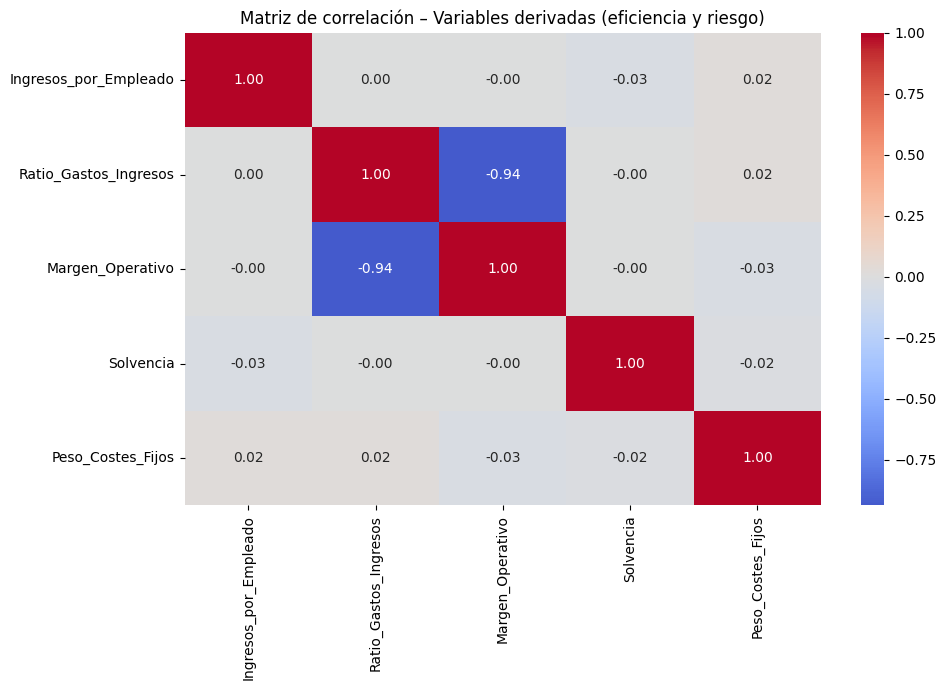

In [40]:
derived_cols = [
    "Ingresos_por_Empleado",
    "Ratio_Gastos_Ingresos",
    "Margen_Operativo",
    "Solvencia",
    "Peso_Costes_Fijos"
]

plt.figure(figsize=(10, 7))
sns.heatmap(
    df[derived_cols].corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    center=0
)
plt.title("Matriz de correlación – Variables derivadas (eficiencia y riesgo)")
plt.tight_layout()
plt.show()


El análisis de correlación confirma que las variables base reflejan relaciones económicas esperables sin multicolinealidad severa, mientras que las variables derivadas introducen métricas de eficiencia y riesgo más concentradas.

Algunas variables derivadas presentan correlaciones moderadas entre sí, lo que será tenido en cuenta en la fase de selección de características para evitar redundancias y sobreajuste.

Este análisis permite pasar a la fase de modelado con un conjunto de variables comprensible, estable y alineado con la lógica financiera de la organización.

## 9 Conclusiones 

#### 9.1 Conclusiones clave del análisis exploratorio
Conclusiones generales

El análisis exploratorio confirma que el dataset presenta una estructura financiera y operativa coherente, con patrones consistentes entre unidades de negocio y suficiente variabilidad para construir modelos predictivos robustos.

Tras la imputación, el dataset no presenta valores nulos y mantiene un número adecuado de observaciones, evitando sesgos por eliminación de datos.

#### 9.2 Variables con mayor valor predictivo (visión negocio)

Desde una perspectiva de control de gestión, las variables que mejor capturan señales tempranas de deterioro financiero son aquellas que miden:

Eficiencia operativa

Estructura de costes

Rentabilidad relativa

Capacidad financiera

Productividad

En este sentido, destacan especialmente:

Ingresos_por_Empleado → productividad y dimensionamiento

Ratio_Gastos_Ingresos → presión sobre márgenes

Margen_Operativo → rentabilidad real normalizada

Solvencia → capacidad de afrontar obligaciones

Peso_Costes_Fijos → rigidez estructural del modelo operativo

#### 9.3 Evaluación de redundancias (visión Data Science)

El EDA también ha permitido identificar variables altamente relacionadas entre sí:

Variables absolutas (Ingresos, Gastos, Activos) capturan tamaño, pero no eficiencia.

Algunas métricas derivadas comparten numeradores o denominadores, generando correlaciones elevadas.

Por este motivo:

Se priorizarán ratios e indicadores normalizados

Se evitará introducir simultáneamente variables redundantes en el modelo

La selección final de features se realizará durante el modelado mediante técnicas de regularización y validación cruzada

Esto reduce el riesgo de overfitting y mejora la generalización del modelo.

#### 9.4 Preparación para la fase de modelado

Tras el EDA, el dataset queda preparado para:

Definir un target de deterioro financiero

Entrenar modelos supervisados con señales financieras claras

Evaluar la capacidad del modelo para anticipar riesgo, no solo describir el pasado

El EDA cumple así su función principal:
transformar datos contables y operativos en señales predictivas accionables.

#### 9.5 Conclusión

El análisis exploratorio ha permitido convertir un conjunto de datos heterogéneo en una base sólida para el modelado predictivo, alineando indicadores financieros y operativos con una lógica de control de gestión.
El siguiente paso será definir formalmente el target y evaluar qué combinaciones de variables permiten anticipar de forma más fiable el deterioro financiero de las unidades de negocio.

## 10. Definición del target y preparación del dataset para modelado

El objetivo de este apartado es definir de forma clara y objetiva la variable objetivo (target) 
que permitirá entrenar modelos de Machine Learning orientados a anticipar deterioro financiero 
en unidades de negocio.

La definición del target se realiza en el EDA para:
- garantizar coherencia conceptual con el análisis exploratorio,
- evitar ambigüedades en la fase de modelado,
- y asegurar que el modelo aprende a partir de señales observables y realistas.

#### 10.1 Definición del target – Visión negocio

Desde una perspectiva organizativa, se considera que una unidad de negocio entra en 
**riesgo de deterioro financiero** cuando muestra simultáneamente:

- baja rentabilidad operativa,
- elevada presión de costes,
- y señales de tensión en su estructura financiera.

Estas situaciones no representan un colapso inmediato, sino una **alerta temprana** 
que permite a la organización intervenir antes de que el deterioro sea estructural.


#### 10.2 Definición del target – Visión Data Science

El target se define a partir de métricas financieras originales, observables y no derivadas 
del feature engineering, para evitar cualquier fuga de información.

Se construye una variable binaria:
- 1 → Unidad en riesgo de deterioro
- 0 → Unidad sin señales de deterioro


#### 10.3 Reglas objetivas para definir “riesgo de deterioro”

In [41]:
# Umbrales basados en percentiles (robustos y realistas)
umbral_margen = df["Margen_Explotacion"].quantile(0.25)
umbral_rentabilidad = df["Indice_Rentabilidad"].quantile(0.25)
umbral_endeudamiento = df["Endeudamiento"].quantile(0.75)


In [42]:
df["Riesgo_Deterioro"] = (
    (df["Margen_Explotacion"] <= umbral_margen) &
    (df["Indice_Rentabilidad"] <= umbral_rentabilidad) &
    (df["Endeudamiento"] >= umbral_endeudamiento)
).astype(int)


#### 10.4 Validación del target

In [43]:
df["Riesgo_Deterioro"].value_counts(normalize=True)

Riesgo_Deterioro
0    0.933718
1    0.066282
Name: proportion, dtype: float64

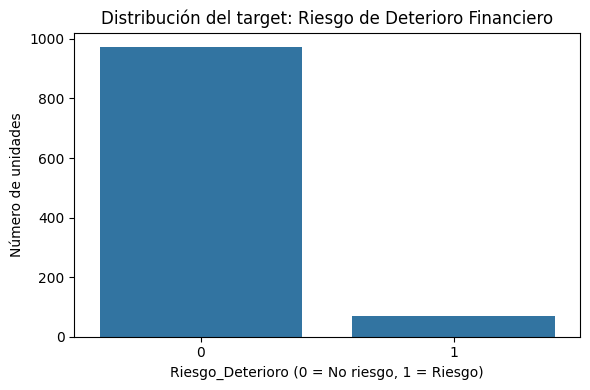

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="Riesgo_Deterioro",
    data=df
)
plt.title("Distribución del target: Riesgo de Deterioro Financiero")
plt.xlabel("Riesgo_Deterioro (0 = No riesgo, 1 = Riesgo)")
plt.ylabel("Número de unidades")
plt.tight_layout()
plt.show()


La distribución del target muestra un claro desbalance: aproximadamente un 6–7% de las observaciones corresponden a unidades con riesgo de deterioro financiero.
Este escenario es representativo de problemas reales de riesgo, donde los eventos críticos son poco frecuentes, y justifica el uso de métricas específicas y técnicas de ajuste durante el modelado.

#### 10.5 Relación del target con variables clave 

In [117]:
df.groupby("Riesgo_Deterioro")[[
    "Margen_Explotacion",
    "Indice_Rentabilidad",
    "Endeudamiento",
    "EBIT"
]].mean()


,Margen_Explotacion,Indice_Rentabilidad,Endeudamiento,EBIT
Riesgo_Deterioro,,,,
0,0.234250,0.012481,0.57495,5673.490096
1,0.100544,-0.085521,0.80861,5947.913850


Las unidades clasificadas como riesgo presentan:
- menores márgenes,
- menor rentabilidad,
- mayor endeudamiento,
confirmando que el target es coherente con la lógica financiera del negocio.


#### 10.6 Uso de las variables derivadas

Las variables creadas en el punto 7 (productividad, eficiencia y estructura de costes) 
**NO se utilizan para construir el target**.

Su función es:
- enriquecer el espacio de información del modelo,
- mejorar la capacidad predictiva,
- y facilitar la interpretación posterior de los resultados.

Estas variables se utilizarán exclusivamente como **features explicativas** 
en la fase de modelado (03_Entrenamiento_Evaluacion.ipynb).


#### 10.7 Limpieza final de columnas

In [118]:
cols_to_drop = [
    "Unidad_ID",      # identificador
    "Departamento"    # categórica (se tratará en modelado si se usa)
]

df_model = df.drop(columns=cols_to_drop)


#### 10.8 Dataset final para modelado

In [114]:
df_model.shape

(1041, 22)

El dataset final contiene:
- observaciones completas,
- variables financieras originales,
- variables derivadas informativas,
- y un target claramente definido.

Está listo para ser utilizado en modelos supervisados de clasificación.


#### 10.9 Exportación del dataset final

In [119]:
df_model.to_csv(
    r"C:\Users\balle\Desktop\DataScience\ML_project\data\Processed\dataset_model_ready.csv",
    index=False
)


### Conclusión final del EDA

El análisis exploratorio ha permitido transformar un conjunto de datos heterogéneo en un 
dataset estructurado, interpretable y alineado con la toma de decisiones organizativa.

Se ha definido un target coherente con la lógica financiera del negocio y se han construido 
variables explicativas orientadas a capturar eficiencia, estructura de costes y productividad.

El dataset resultante está preparado para la fase de modelado, donde se entrenarán modelos 
capaces de anticipar deterioro financiero y apoyar una gestión más proactiva.


In [2]:
!pip install nbconvert


   ------------- -------------------------- 3/9 [mistune]
   -------------------------- ------------- 6/9 [bleach]
   -------------------------- ------------- 6/9 [bleach]
   ----------------------------------- ---- 8/9 [nbconvert]
   ----------------------------------- ---- 8/9 [nbconvert]
   ---------------------------------------- 9/9 [nbconvert]



#### 10.10 Exportación 

In [3]:
import nbformat
from nbconvert import PythonExporter
from pathlib import Path

# Ruta del notebook actual
notebook_path = Path("02_EDA.ipynb")

# Ruta de salida
output_path = Path("../src/data_processing.py")

# Cargar notebook
with open(notebook_path, encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Convertir a script Python
exporter = PythonExporter()
script, _ = exporter.from_notebook_node(nb)

# Guardar en src
with open(output_path, "w", encoding="utf-8") as f:
    f.write(script)

print("✅ data_processing.py generado correctamente en /src")


✅ data_processing.py generado correctamente en /src
